<a href="https://colab.research.google.com/github/sungjuGit/COSMOS_Ju/blob/main/COSMOS_ML_01rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


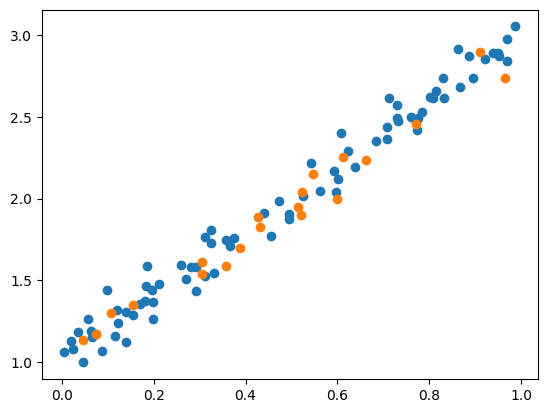

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val)

In [ ]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

[0.49671415] [-0.1382643]


In [ ]:
# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train

    # How wrong is our model? That's the error!
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()

    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad

print(a, b)

[1.02354094] [1.96896411]


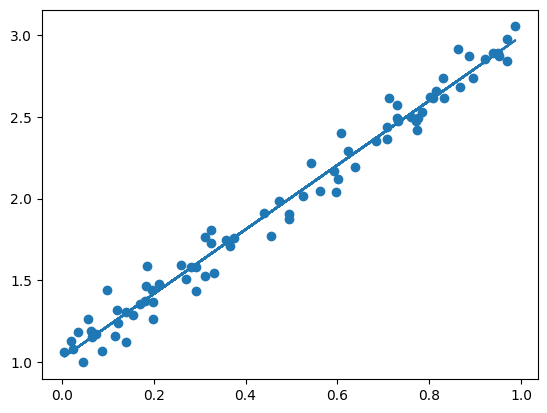

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, a + b * x_train)

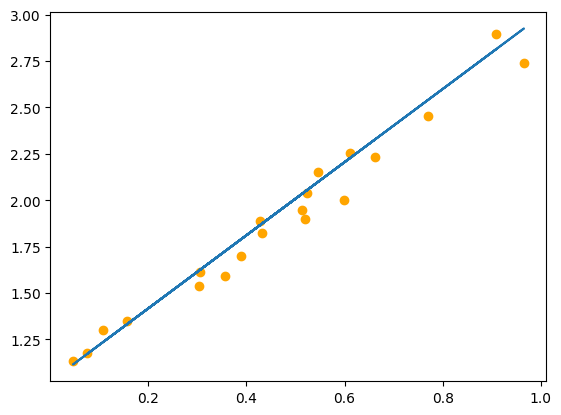

In [ ]:
plt.scatter(x_val, y_val, color="orange")
plt.plot(x_val, a + b * x_val)

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn


# Our data was in Numpy arrays, so we first need to transform them into PyTorch's Tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

torch.manual_seed(42)

a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):

    yhat = a + b * x_train_tensor

    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad() # to clear out the gradients for a new epoch

print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)
